In [59]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import os.path
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [53]:
# load the data
_data = np.load('res/data_dense.npy', allow_pickle=True).tolist()
saps_ii = _data['saps_ii_dense']
X_train, X_val, X_test = _data['X_train_dense'], _data['X_val_dense'], _data['X_test_dense']
Y_train, Y_val, Y_test = _data['Y_train_dense'], _data['Y_val_dense'], _data['Y_test_dense']
print("Loaded!")

Loaded!


In [4]:
# Check that the data has been loaded correctly (outputs should be the same as in data_split.ipynb)
print("No. of patients: {}".format(len(saps_ii)))
print("No. of patients in train, val, test sets: {}, {}, {}".format(len(X_train), len(X_val), len(X_test)))
print("No. of patients who died in hospital in train, val, test sets: {}, {}, {}".format(sum(Y_train), sum(Y_val), sum(Y_test)))
print("Proportion of patients who died in hospital in train, val, test sets: {}%, {}%, {}%".format(round(sum(Y_train)/len(Y_train)*100,3), round(sum(Y_val)/len(Y_val)*100,3), round(sum(Y_test)/len(Y_test)*100,3)))

No. of patients: 5781
No. of patients in train, val, test sets: 4046, 867, 868
No. of patients who died in hospital in train, val, test sets: 1018, 220, 225
Proportion of patients who died in hospital in train, val, test sets: 25.161%, 25.375%, 25.922%


In [11]:
# Show example of one patient
labels = ['Age', 'Heart Rate', 'Systolic BP', 'Temperature', 'PaO2/FiO2', 'Urine Output', 'BUN', \
          'WBC', 'Potassium', 'Sodium', 'Bicarbonate', 'Bilirubin', 'GCS', 'Comorbidity', 'Admission Type']

patient = 2
for feature in range(len(labels)):
    print('{}: {}'.format(labels[feature], X_train[patient,feature]))
print('Outcome: {}'.format('Died in hospital' if Y_train[patient]==1 else 'Survived'))

Age: 65.70
Heart Rate: 95.0
Systolic BP: 138.0
Temperature: 36.9999991522895
PaO2/FiO2: 412.0
Urine Output: 1258.0
BUN: 7.0
WBC: 11.4
Potassium: 3.9
Sodium: 143.0
Bicarbonate: 23.0
Bilirubin: 0.2
GCS: 13.0
Comorbidity: None
Admission Type: Medical
Outcome: Survived


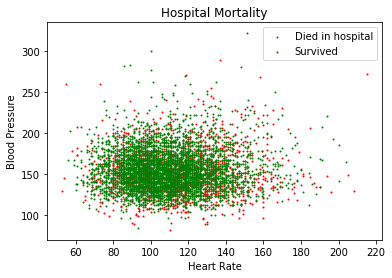

In [16]:
# Filter for patients that died in hospital
dead = saps_ii[saps_ii[:,-1] == 1]

# Filter for patients that survived
alive = saps_ii[saps_ii[:,-1] == 0]

# Plots
plt.scatter(dead[:,6], dead[:,7], s=1, label='Died in hospital', facecolor='r')
plt.scatter(alive[:,6], alive[:,7], s=1, label='Survived', facecolor='g')
plt.legend()
plt.xlabel('Heart Rate')
plt.ylabel('Blood Pressure')
plt.title('Hospital Mortality')
plt.show()

In [54]:
# Combine training and validation sets, using numeric features only, and convert to floats
X_train = np.concatenate((X_train[:,:-3],X_val[:,:-3])).astype(float)
X_test = X_test[:,:-3].astype(float)
Y_train = np.concatenate((Y_train,Y_val)).astype(float)
Y_test = Y_test.astype(float)

print(np.shape(X_train))
print(np.shape(Y_train))
print(np.shape(X_test))
print(np.shape(Y_test))

(4913, 12)
(4913,)
(868, 12)
(868,)


In [67]:
# Create decision tree classifer object
decisionTree = DecisionTreeClassifier()

# Train decision tree classifer
decisionTree = decisionTree.fit(X_train,Y_train)

# Predict the response for test dataset
Y_pred = decisionTree.predict(X_test)

In [68]:
# Show metrics for decision tree classifier
print("Metrics for decision tree classifier:")
print("")
print(metrics.classification_report(Y_test, Y_pred, target_names = ["Survived", "Died"]))

Metrics for decision tree classifier:

              precision    recall  f1-score   support

    Survived       0.80      0.81      0.81       643
        Died       0.44      0.44      0.44       225

    accuracy                           0.71       868
   macro avg       0.62      0.62      0.62       868
weighted avg       0.71      0.71      0.71       868



In [69]:
# Create logistic regression classifer object
logisticRegr = LogisticRegression(solver = "liblinear")

# Train logistic regression classifer
logisticRegr.fit(X_train, Y_train)

# Predict the response for test dataset
Y_pred = logisticRegr.predict(X_test)

In [70]:
# Show metrics for logistic regression classifier
print("Metrics for logistic regression classifier:")
print("")
print(metrics.classification_report(Y_test, Y_pred, target_names = ["Survived", "Died"]))

Metrics for logistic regression classifier:

              precision    recall  f1-score   support

    Survived       0.77      0.95      0.85       643
        Died       0.58      0.19      0.28       225

    accuracy                           0.75       868
   macro avg       0.67      0.57      0.57       868
weighted avg       0.72      0.75      0.70       868

